In [1]:
# Problem Statement: Predict the taxi fare given the source, destination and number of passengers in New York City

In [2]:
# Loading the data:

In [3]:
import pandas as pd
import numpy as np

In [4]:
data_file = r'C:\Users\AnitaM\Downloads\New York City Taxi Fare\train.csv'

In [5]:
nyfare = pd.read_csv(data_file)

In [6]:
nyfare.shape

(50000, 8)

In [7]:
nyfare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
# key column can be dropped

In [9]:
nyfare.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


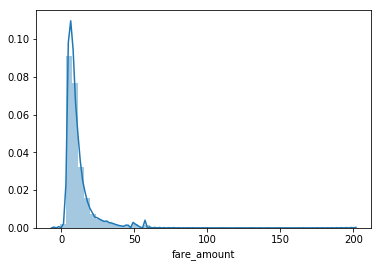

In [12]:
# Checking the distribution of the target variable : fare_amount:
sns.distplot(nyfare['fare_amount'])

In [13]:
# The above data is positively skewed.

In [14]:
nyfare['passenger_count'].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: passenger_count, dtype: int64

In [15]:
pivot_passenger_count = nyfare.pivot_table(index='passenger_count', values='fare_amount', aggfunc=np.median)
pivot_passenger_count.head()

,fare_amount
passenger_count,
0,7.7
1,8.5
2,8.5
3,8.5
4,8.5


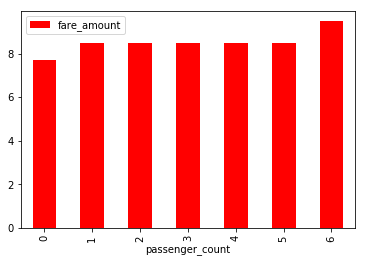

In [16]:
pivot_passenger_count.plot(kind='bar', color='Red')

In [17]:
# High number of passengers : high taxi fare

In [18]:
# Create a new feature from date and time with four categories : Morning, Afternoon, Evening, Night to see how fare varies throughout the day

In [19]:
nyfare['pickup_datetime'] = pd.to_datetime(nyfare['pickup_datetime'], infer_datetime_format=True)
nyfare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [20]:
nyfare['pickup_time_hour'] = pd.DatetimeIndex(nyfare['pickup_datetime']).hour
nyfare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7


In [21]:
for i in range(len(nyfare)):
    if nyfare['pickup_time_hour'][i] >= 5 and nyfare['pickup_time_hour'][i] <= 12:
        nyfare.loc[i, 'pickup_at'] = 'Morning'
    if nyfare['pickup_time_hour'][i] > 12 and nyfare['pickup_time_hour'][i] <= 16:
        nyfare.loc[i, 'pickup_at'] = 'Afternoon'
    if nyfare['pickup_time_hour'][i] > 16 and nyfare['pickup_time_hour'][i] <= 21:
        nyfare.loc[i, 'pickup_at'] = 'Evening'
    if nyfare['pickup_time_hour'][i] > 21: 
        nyfare.loc[i, 'pickup_at'] = 'Night'
    if nyfare['pickup_time_hour'][i] >= 0 and nyfare['pickup_time_hour'][i] < 5:
        nyfare.loc[i, 'pickup_at'] = 'Night'

In [22]:
nyfare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_hour,pickup_at
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,Evening
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,Afternoon
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Night
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,Night
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Morning


In [23]:
# Check to see how the pickup time during the day affects the fare amount:
pivot_pickup_at = nyfare.pivot_table(index='pickup_at', values='fare_amount', aggfunc=np.mean)
pivot_pickup_at.head()

,fare_amount
pickup_at,
Afternoon,12.002138
Evening,10.991904
Morning,11.152156
Night,11.595090


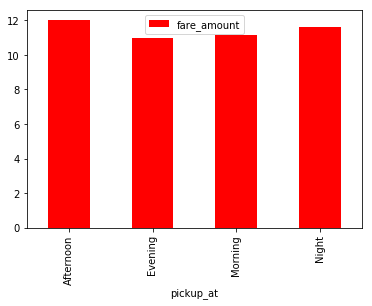

In [24]:
pivot_pickup_at.plot(kind='bar', color='Red')

In [25]:
# There is not much affect on the fare amount by the pick up time category through out the day. 

In [26]:
from geopy import distance

In [27]:
nyfare[nyfare['pickup_latitude']>90].head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_hour,pickup_at
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1,11,Morning


In [28]:
nyfare.drop(nyfare[nyfare['pickup_latitude']>90].index, inplace=True) # the latitude range has to be in -90 to 90 range

In [29]:
nyfare.reset_index(drop=True, inplace=True)

In [30]:
for i in range(len(nyfare)):
    pickup = (nyfare['pickup_latitude'][i], nyfare['pickup_longitude'][i])
    dropoff = (nyfare['dropoff_latitude'][i], nyfare['dropoff_longitude'][i])
    nyfare.loc[i, 'Distance'] = distance.distance(pickup, dropoff).miles

In [31]:
nyfare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time_hour,pickup_at,Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,Evening,0.639764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,Afternoon,5.246511
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Night,0.863167
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,Night,1.737223
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Morning,1.241710


C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


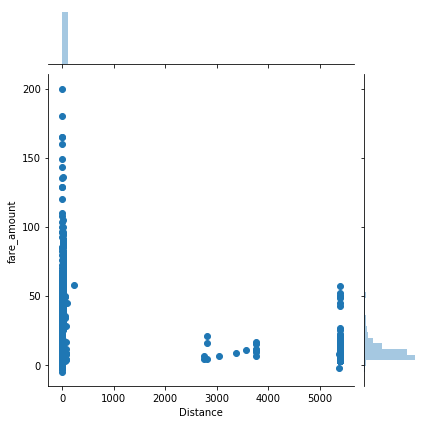

In [34]:
sns.jointplot(x='Distance', y='fare_amount', data=nyfare)

C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


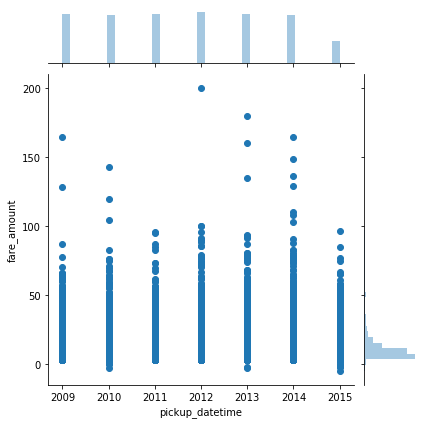

In [35]:
sns.jointplot(x=pd.DatetimeIndex(nyfare['pickup_datetime']).year, y='fare_amount', data=nyfare)

C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


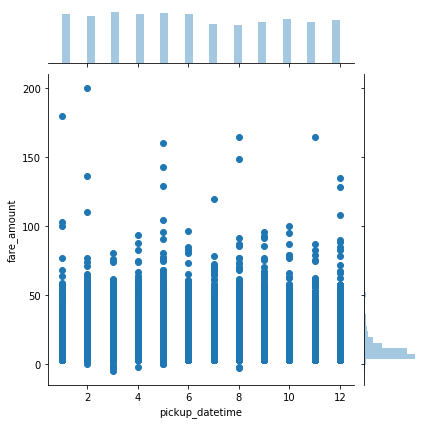

In [36]:
sns.jointplot(x=pd.DatetimeIndex(nyfare['pickup_datetime']).month, y='fare_amount', data=nyfare)

C:\Users\AnitaM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


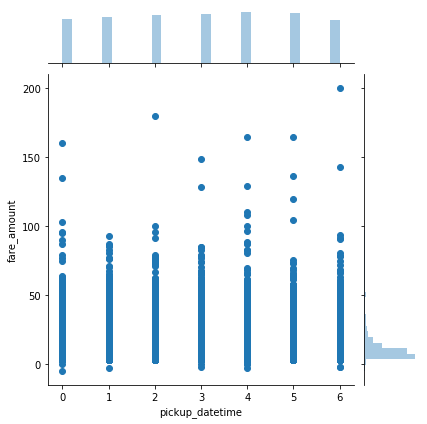

In [37]:
sns.jointplot(x=pd.DatetimeIndex(nyfare['pickup_datetime']).weekday, y='fare_amount', data=nyfare)

In [38]:
nyfare['pickup_time_year'] = pd.DatetimeIndex(nyfare['pickup_datetime']).year
nyfare['pickup_time_month'] = pd.DatetimeIndex(nyfare['pickup_datetime']).month
nyfare['pickup_time_weekday'] = pd.DatetimeIndex(nyfare['pickup_datetime']).weekday

In [39]:
nyfare.dtypes

key                            object
fare_amount                   float64
pickup_datetime        datetime64[ns]
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
passenger_count                 int64
pickup_time_hour                int64
pickup_at                      object
Distance                      float64
pickup_time_year                int64
pickup_time_month               int64
pickup_time_weekday             int64
dtype: object

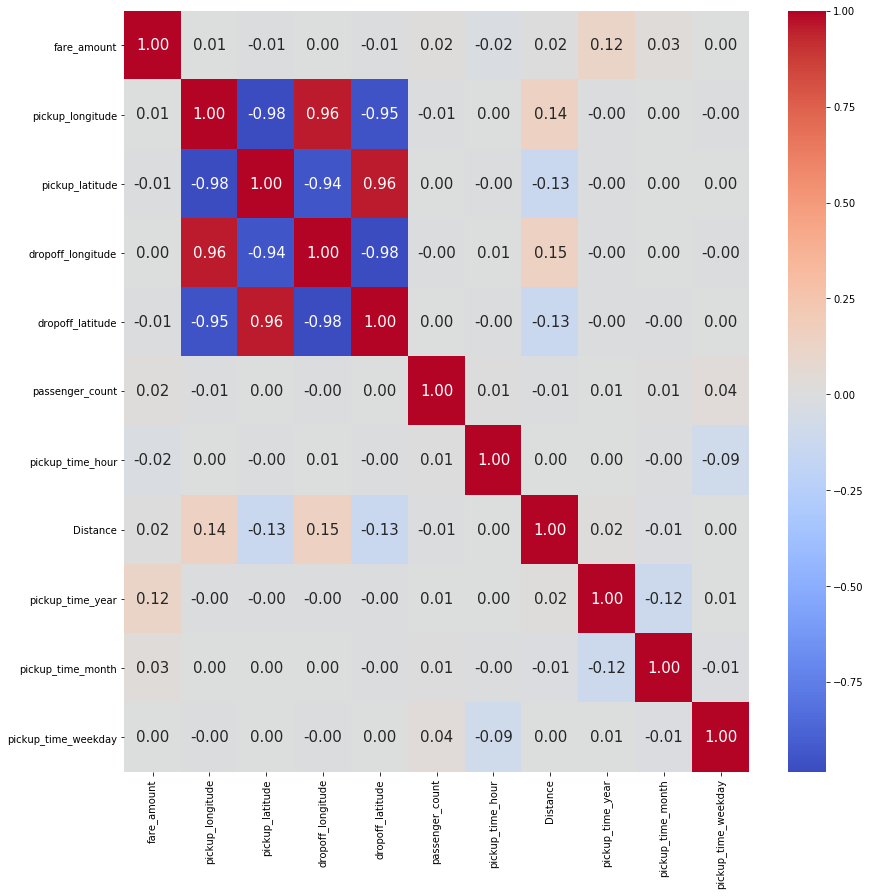

In [41]:
#plot correlation map:
numeric_data = nyfare.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')

In [42]:
numeric_data.corr()['fare_amount']

fare_amount            1.000000
pickup_longitude       0.005942
pickup_latitude       -0.006598
dropoff_longitude      0.004283
dropoff_latitude      -0.005440
passenger_count        0.016574
pickup_time_hour      -0.022025
Distance               0.015677
pickup_time_year       0.120826
pickup_time_month      0.026880
pickup_time_weekday    0.000537
Name: fare_amount, dtype: float64

In [43]:
# variables to be used : passenger_count, Distance, pickup_time_year, pickup_time_month, pickup_time_weekday